## 전국 신규 민간 아파트 분양가격 동향
2015년 10월부터 2018년 7월까지
주택분양보증을 받아 분양한 전체 민간 신규아파트 분양가격 동향
https://www.data.go.kr/dataset/3035522/fileData.do
이 튜토리얼은 아파트 분양가에 대한 분석보다 파이썬 데이터 분석 방법을 배우는데 목적을 두고 있습니다.
이 튜토리얼에서는 파이썬 데이터분석 도구인 Pandas를 활용합니다. Pandas에 대한 간략한 소개는 다음의 판다스 10분 완성 문서를 참고해 주시면 좋습니다.
https://dataitgirls2.github.io/10minutes2pandas/
또 시각화 도구로는 grammer of graphics 문법을 활용할 수 있는 plotnine을 사용합니다.
이 튜토리얼은 데잇걸즈 2기와 파이콘 한국 2018에서 진행되기도 했습니다.
다음의 경로에서 온라인 분석도구인 Colaboratory의 사본을 생성해서 직접 실행하는 실습을 진행해 보실 수도 있습니다.
https://goo.gl/jSr7WU
데이터 다운로드 : https://goo.gl/oJydAv
!중요
버전과 한글폰트
한글폰트 사용하기 : http://corazzon.github.io/matplotlib_font_setting
* 2020 버전으로 파일만 다르게 해서 분석!

In [5]:
!pip show plotnine

Name: plotnine
Version: 0.7.1
Summary: A grammar of graphics for python
Home-page: https://github.com/has2k1/plotnine
Author: None
Author-email: None
License: GPL-2
Location: c:\programdata\anaconda3\lib\site-packages
Requires: mizani, statsmodels, patsy, numpy, matplotlib, descartes, pandas, scipy
Required-by: 


In [8]:
!pip show missingno

Name: missingno
Version: 0.4.2
Summary: Missing data visualization module for Python.
Home-page: https://github.com/ResidentMario/missingno
Author: Aleksey Bilogur
Author-email: aleksey.bilogur@gmail.com
License: UNKNOWN
Location: c:\programdata\anaconda3\lib\site-packages
Requires: seaborn, numpy, scipy, matplotlib
Required-by: 


In [9]:
import warnings # 경고를 무시해줘서 노트북을 보다 좀 깔끔하게 이용
warnings.filterwarnings('ignore')

In [54]:
import pandas as pd
import numpy as np
import re # 정규표현식
from plotnine import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False # 폰트 꺠짐 방지

# 설치된 한글 폰트 출력

import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

In [24]:
# 현재 위치정보를 봅니다.
%pwd

'C:\\Users\\User\\Desktop\\오늘코딩'

In [42]:
# data 폴더 아래에 apt_price 라는 폴더를 만들어 공공데이터 포털에서 다운로드 받은 데이터를 모아 두었습니다 해당 파일을 확인해 봅니다.
%ls 전*
#오늘코딩/apt_price/

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 2ADA-EEDE

 C:\Users\User\Desktop\오늘코딩 디렉터리

2021-01-06  오후 04:52             8,818 전국 신규 민간 아파트 분양가격 동향.ipynb
               1개 파일               8,818 바이트
               0개 디렉터리  10,852,720,640 바이트 남음


In [43]:
pre_sale = pd.read_csv('C:/Users/User/Desktop/오늘코딩/민간아파트_분양가격_동향_20200331.csv', encoding='euc-kr') 
pre_sale.shape 
# 데이터 불러오고 데이터 행과 열 확인 
#보통 encoding utf-8인데 공공데이터는 인코딩을 안부르면 데이터를 못 부를 수도 있음 꼭 해당파일의 인코딩 지정 필수

(4590, 5)

In [46]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [45]:
pre_sale.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
4585,제주,전체,2020,3,3955
4586,제주,전용면적 60㎡이하,2020,3,4039
4587,제주,전용면적 60㎡초과 85㎡이하,2020,3,3962
4588,제주,전용면적 85㎡초과 102㎡이하,2020,3,NaN
4589,제주,전용면적 102㎡초과,2020,3,3601


In [48]:
# 분양가격이 숫자 타입이 아닙니다. 숫자 타입으로 변경해줄 필요가 있겠습니다.
pre_sale.info() # info 요약을 볼 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4590 non-null   object
 1   규모구분     4590 non-null   object
 2   연도       4590 non-null   int64 
 3   월        4590 non-null   int64 
 4   분양가격(㎡)  4276 non-null   object
dtypes: int64(2), object(3)
memory usage: 179.4+ KB


In [50]:
pre_sale.dtypes # 어떤 데이터 형식인지 확인 가능

 

지역명        object
규모구분       object
연도          int64
월           int64
분양가격(㎡)    object
dtype: object

In [58]:
pre_sale.isnull().sum() # 결측치 값이 몇개인지? = 분양가격 314개

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    314
dtype: int64

In [60]:
plt.rcParams['font.family'] = 'Malgun Gothic' # 맑은고딕 출력
# plt.rcParams['font.family'] = 'NanumGothic'

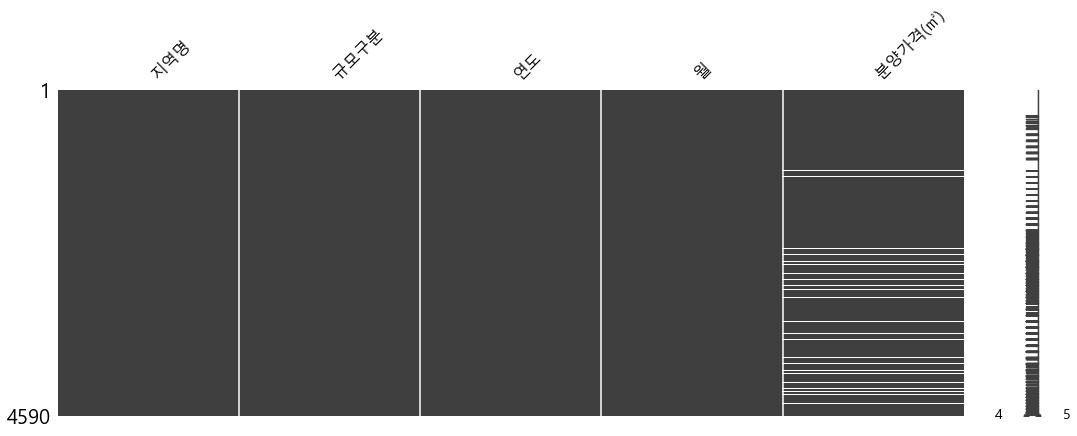

In [61]:
# 결측치를 시각화 
import missingno as msno
msno.matrix(pre_sale, figsize=(18,6))
# 위에 줄을 안하면 폰트가 깨져서 위에껄 필수적으로 실행해야함.

In [66]:
# 연도와 월은 카테고리 형태의 데이터이기 때문에 스트링 형태로 변경
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)

In [67]:
pre_sale_price = pre_sale['분양가격(㎡)'] # 전처리 전에 새로 데이터를 만들어줌

In [69]:
# 수치형 데이터로 데이터 전처리 
# 분양가격의 타입을 숫자로 변경해 줍니다.
pre_sale['분양가격'] = pd.to_numeric(pre_sale_price, errors='coerce')
# 평당 분양가격을 구해보자.
pre_sale['평당분양가격'] = pre_sale['분양가격'] *3.3

In [70]:
pre_sale.info() 
# 연도와 월은 str로 변형됨
# float데이터 형태로 분양가격 이랑 평당분양가격이 생성됨.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4590 non-null   object 
 1   규모구분     4590 non-null   object 
 2   연도       4590 non-null   object 
 3   월        4590 non-null   object 
 4   분양가격(㎡)  4276 non-null   object 
 5   분양가격     4260 non-null   float64
 6   평당분양가격   4260 non-null   float64
dtypes: float64(2), object(5)
memory usage: 251.1+ KB


In [71]:
pre_sale.dtypes # 데이터 타입만 검색

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

In [72]:
# 분양가격에 결측치가 많이 있다.
pre_sale.isnull().sum()
# 결측치가 늘어난 이유 수치형이 되면서 공백값도 결측치로 인식했기 때문에

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    314
분양가격       330
평당분양가격     330
dtype: int64

In [75]:
pre_sale.describe() # 수치형 데이터 기술통계 확인 가능

,분양가격,평당분양가격
count,4260.000000,4260.000000
mean,3270.160798,10791.530634
std,1300.362742,4291.197050
min,1868.000000,6164.400000
25%,2454.750000,8100.675000
50%,2890.000000,9537.000000
75%,3601.000000,11883.300000
max,13835.000000,45655.500000


In [76]:
pre_sale.describe? # 도움말

In [74]:
pre_sale.describe(include=[np.object]) 
# object타임의 데이터도 요약을 해서 보여줌 랜덤하게 보여준다
# 데이터 4590 빈번하게 나오는 수 270 

,지역명,규모구분,연도,월,분양가격(㎡)
count,4590,4590,4590,4590,4276
unique,17,5,6,12,1766
top,광주,전용면적 102㎡초과,2016,3,3395
freq,270,918,1020,425,18


In [81]:
# 2020년 데이터만 봅시다.
pre_sale_2020 = pre_sale.loc[pre_sale['연도']=='2020']
pre_sale_2020.shape
# pre_sale_2020 = pre_sale.loc[pre_sale['연도']==2020] # 수치형으로 데이터 안뜸 데이터 타입이 매우 중요함!
# pre_sale_2020.shape

(255, 7)

In [83]:
# 같은 값을 갖고 있는 걸로 시도별로 동일하게 데이터가 들어 있는 것을 확인할 수 있습니다.
pre_sale['규모구분'].value_counts()

전용면적 102㎡초과          918
전용면적 85㎡초과 102㎡이하    918
전용면적 60㎡초과 85㎡이하     918
전체                   918
전용면적 60㎡이하           918
Name: 규모구분, dtype: int64

In [85]:
pre_sale['지역명'].value_counts()

광주    270
전북    270
인천    270
강원    270
울산    270
대전    270
제주    270
부산    270
경남    270
충북    270
충남    270
경북    270
전남    270
세종    270
대구    270
서울    270
경기    270
Name: 지역명, dtype: int64